## Datos abiertos de la CDMX

In [99]:
import importlib
import sys
sys.path.append('..')
from lib import utils

In [123]:
importlib.reload(utils)

<module 'lib.utils' from '../lib/utils.py'>

In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('bmh')

### 1 Calidad de los datos

In [5]:
cdmx = pd.read_csv('https://datos.cdmx.gob.mx/datastore/dump/48fcb848-220c-4af0-839b-4fd8ac812c0f?bom=True')

/home/jackal/miniconda3/envs/standard/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2 Número de registros

In [6]:
cdmx.shape

(1168250, 20)

In [7]:
cdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168250 entries, 0 to 1168249
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   _id                   1168250 non-null  int64  
 1   ao_hechos             1167817 non-null  float64
 2   mes_hechos            1167817 non-null  object 
 3   fecha_hechos          1167817 non-null  object 
 4   ao_inicio             1168250 non-null  int64  
 5   mes_inicio            1168250 non-null  object 
 6   fecha_inicio          1168250 non-null  object 
 7   delito                1168250 non-null  object 
 8   fiscalia              1168248 non-null  object 
 9   agencia               1168250 non-null  object 
 10  unidad_investigacion  1168023 non-null  object 
 11  categoria_delito      1168250 non-null  object 
 12  calle_hechos          1165281 non-null  object 
 13  calle_hechos2         459035 non-null   object 
 14  colonia_hechos        1120818 non-

In [9]:
cdmx['date'] = cdmx['fecha_inicio'].apply(lambda x: str(x)[:10])
cdmx['date'] = pd.to_datetime(cdmx['date'], format='%Y-%m-%d')

In [10]:
cdmx['date'].min(), cdmx['date'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2021-02-28 00:00:00'))

### 3 Distribución del número de delitos

In [16]:
cdmx.delito.value_counts()

VIOLENCIA FAMILIAR                                                        116315
FRAUDE                                                                     70594
ROBO DE OBJETOS                                                            68924
ROBO A NEGOCIO SIN VIOLENCIA                                               65363
AMENAZAS                                                                   61248
                                                                           ...  
ASOCIACION DELICTUOSA                                                          1
UTILIZACION INDEBIDA DE LA VIA PUBLICA                                         1
VIOLACION A LOS DERECHOS HUMANOS                                               1
CALUMNIAS                                                                      1
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA         1
Name: delito, Length: 341, dtype: int64

### 4 Delitos a la alza y a la baja

In [120]:
delitos_top = cdmx.delito.value_counts().index.tolist()
len(delitos_top)

341

In [121]:
delitos = cdmx[cdmx['date']>'2020-01-01'].groupby(['date','delito'], as_index=False).agg({'delito':['first','count']})
delitos.columns = ['date','name','count']

In [122]:
delitos_date = pd.pivot_table(delitos[delitos['name'].isin(delitos_top)], values='count', index='date', columns='name').fillna(0)
len(delitos_date.columns)

285

In [112]:
trends = {}
for d in delitos_date.columns:
    data = delitos_date[d]
    
    y = data.values
    x = np.arange(0, len(data.index)).reshape(-1, 1)

    reg = LinearRegression().fit(x, y)
    trends[reg.coef_[0]] = d

In [113]:
sorted_index = np.argsort(np.array(list(trends.keys())))
sorted_array = np.array(list(trends.keys()))[sorted_index]
sorted_array = np.flip(sorted_array)

Delitos en ascenso


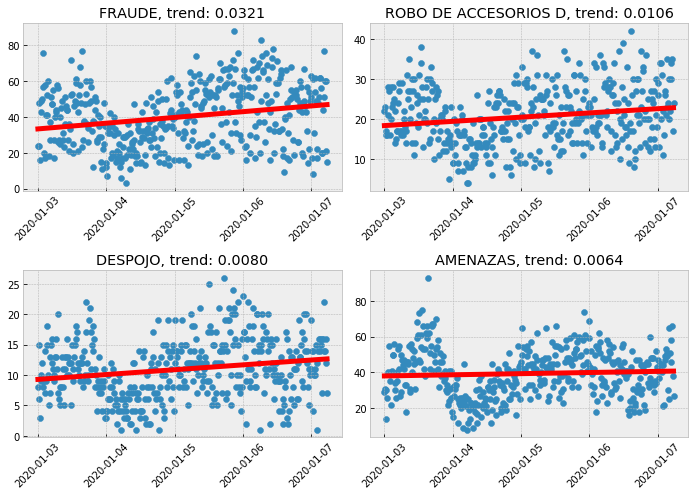

In [124]:
utils.display_grid('up', trends, sorted_array, delitos_date)

Delitos en descenso


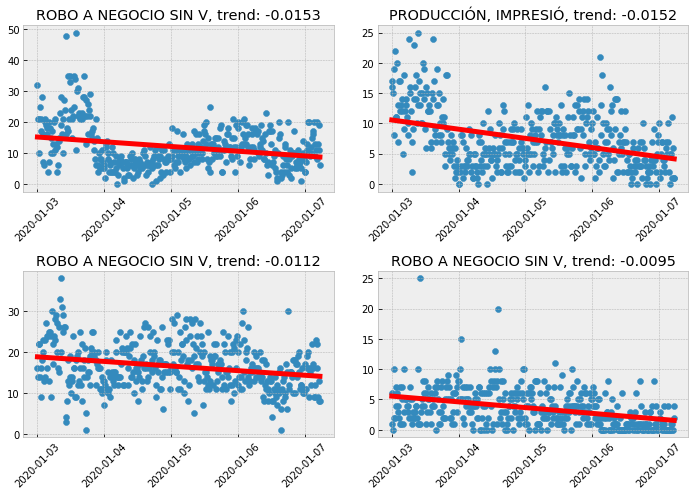

In [125]:
utils.display_grid('down', trends, sorted_array, delitos_date)

In [117]:
cdmx.delito.value_counts()['FRAUDE']

70594

In [119]:
delitos[delitos['name']=='FRAUDE'].date.min(), delitos[delitos['name']=='FRAUDE'].date.max()

(Timestamp('2020-01-02 00:00:00'), Timestamp('2021-02-28 00:00:00'))

In [ ]:
cdmx.